In [2]:
import pandas as pd
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

u'0.18.1'

In [3]:
%matplotlib inline

http://hbd.org/brewery/library/HydromCorr0992.html

Hydrometer Temperature Corrections

Posted to HBD #963, 9/7/92, by Christopher Lyons Following up on the specific
gravity of water as a function of temperature.... The earlier equation was
based on data for 50F-to-105F. Since the equation was from a polynomial fit,
it should not be trusted for predicting SG outside this temperature range.
The data below was obtained using the "Handbook of Chemistry and Physics (CRC)"
and is valid for a temperature range between 0 and 212F.
    
        Temp (C)  Temp (F)  Density  Correction relative to 59F
        -------   --------  -------  --------------------------
        0          32      0.99987      -0.74
        3.98       39.16   1.00000      -0.87
        5          41      0.99999      -0.86
        10         50      0.99973      -0.6
        15         59      0.99913      0
        18         64.4    0.99862      0.51
        20         68      0.99823      0.9
        25         77      0.99707      2.06
        30         86      0.99567      3.46
        35         95      0.99406      5.07
        38         100.4   0.99299      6.14
        40         104     0.99224      6.89
        45         113     0.99025      8.88
        50         122     0.98807      11.06
        55         131     0.98573      13.4
        60         140     0.98324      15.89
        65         149     0.98059      18.54
        70         158     0.97781      21.32
        75         167     0.97489      24.24
        80         176     0.97183      27.3
        85         185     0.96865      30.48
        90         194     0.96534      33.79
        95         203     0.96192      37.21
        100        212     0.95838      40.75

The correction term was computed relative to 15C (59F). It may be easily
calculated relative to any temperature. A third order polynomial fit to
this data was also very good (R**2 = 0.999969):

        Correction(@59F) =
           1.313454 - 0.132674*T + 2.057793e-3*T**2 - 2.627634e-6*T**3

                where T is in degrees F.

This equation should be good for the entire temperature range of interest

In [71]:
data=pd.read_csv("temp_density.csv", header=None)
data.head()

,0,1,2,3
0,0.00,32.00,0.99987,-0.74
1,3.98,39.16,1.00000,-0.87
2,5.00,41.00,0.99999,-0.86
3,10.00,50.00,0.99973,-0.60
4,15.00,59.00,0.99913,0.00


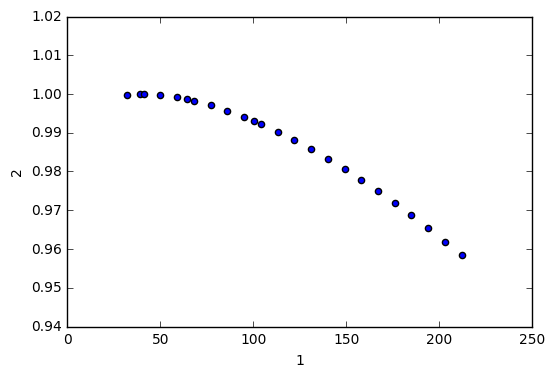

In [72]:
df = pd.DataFrame(data)
df.plot.scatter(x=1, y=2)

In [82]:
def get_equation(xdata, ydata, order=3):
    qout = np.polyfit(xdata, ydata, order)
    print(np.poly1d(qout))
    return qout

In [91]:
def graph(xdata, xlim, ydata, ylim, qout):
    xp = np.linspace(*xlim, num=1500)
    fn = np.poly1d(qout)
    pxp = fn(xp)

    plt.plot(xdata, ydata, '.', xp, pxp, '-')
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xlabel('x')
    plt.ylabel('y', rotation='horizontal')
    plt.grid(True)
    plt.show()

In [92]:
xdata = df[1]
ydata = df[2]

qout = get_equation(xdata, ydata, 3)

           3             2
2.628e-09 x - 2.058e-06 x + 0.0001327 x + 0.9978


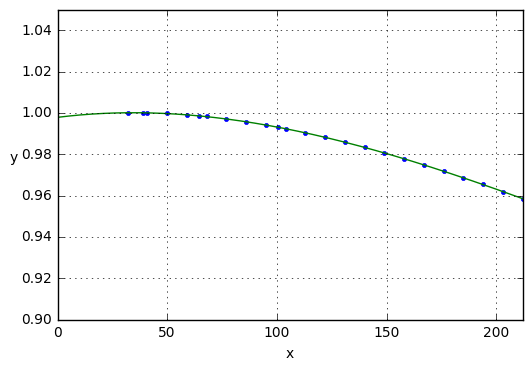

In [93]:
graph(xdata, [0, 212], ydata, [0.9, 1.05], qout)